In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris

from sklearn.model_selection import cross_val_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load iris data
iris = load_iris()

X = iris.data
y = iris.target

In [3]:
# Data info
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
#Train model 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.predict(X_test)

array([2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1,
       0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2,
       2])

In [6]:
# Fit
y_pred = knn.predict(X_test)

In [7]:
# Accuracy
accuracy = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(accuracy)
print(mse)
print(classification_report(y_test, y_pred))

0.9325337331334332
0.044444444444444446
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.87      0.93        15
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



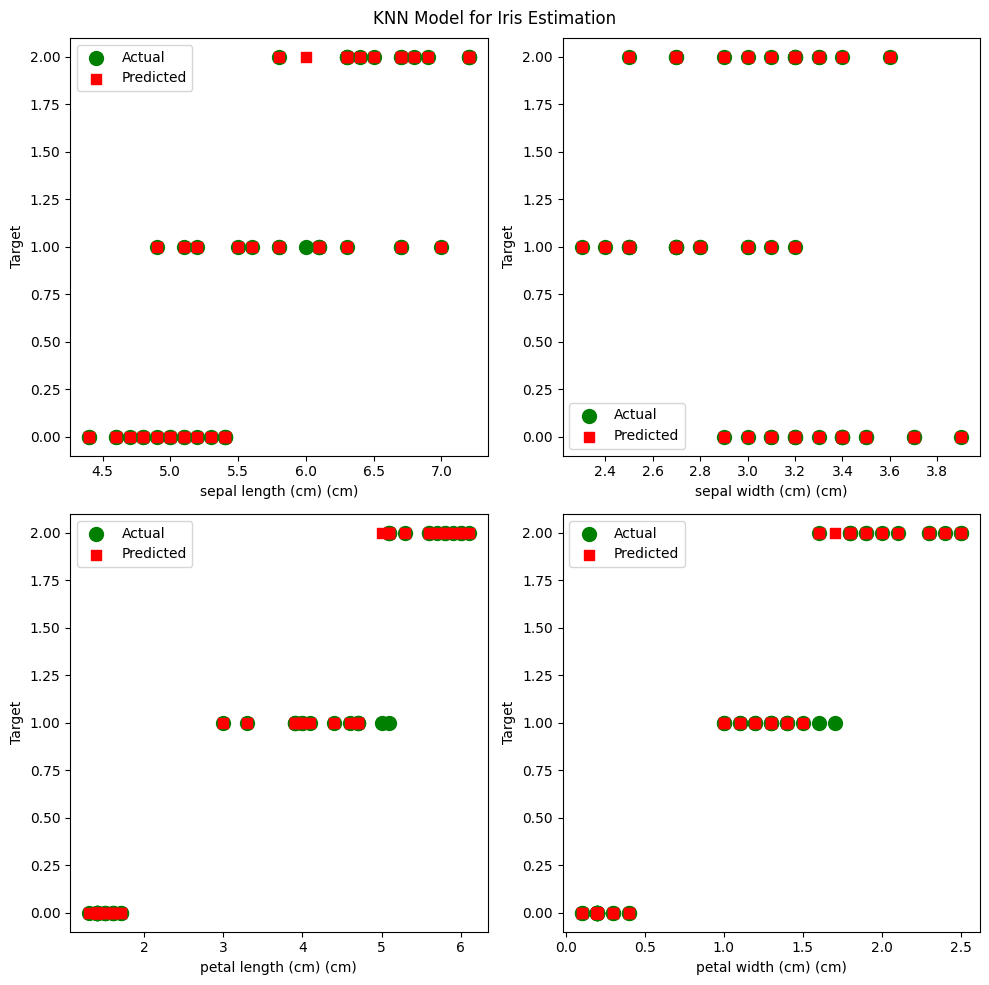

In [8]:
# Visualize training set results

# Define a colorblind-friendly palette
colors = sns.color_palette("colorblind", n_colors=2)

# Set the marker sizes for the actual and predicted values
actual_marker_size = 100
predicted_marker_size = 50

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

# Iterate over each Iris feature and plot the actual and predicted values
for i in range(X_test.shape[1]):
    axs[i].scatter(X_test[:, i], y_test, color="green", marker='o', s=actual_marker_size, label='Actual')
    axs[i].scatter(X_test[:, i], y_pred, color="red", marker='s', s=predicted_marker_size, label='Predicted')
    axs[i].set_xlabel(f'{iris.feature_names[i]} (cm)')
    axs[i].set_ylabel('Target')
    axs[i].legend()

fig.suptitle('KNN Model for Iris Estimation')
plt.tight_layout()
plt.show()

0.9325337331334332
0.9325337331334332
0.9325337331334332
0.9325337331334332


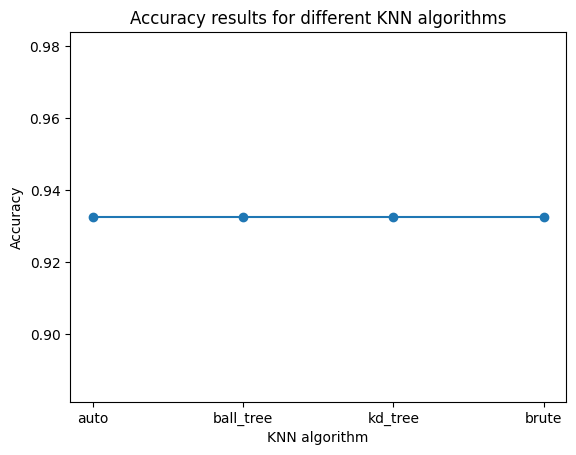

In [9]:
# Define different knn algorithms to try
knn_algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Initialize list to store accuracy results for each algorithm
accuracy_results = []

# Train KNeighborsClassifier with different knn algorithms and calculate accuracy
for knn_algorithm in knn_algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=knn_algorithm, p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracy_results.append(accuracy)
    print(accuracy)

# Plot accuracy results
plt.plot(knn_algorithms, accuracy_results, marker='o')
plt.title("Accuracy results for different KNN algorithms")
plt.xlabel("KNN algorithm")
plt.ylabel("Accuracy")
plt.show()

Accuracy with n_neighbors=1: 0.97
Accuracy with n_neighbors=3: 0.97
Accuracy with n_neighbors=5: 0.93
Accuracy with n_neighbors=7: 0.93
Accuracy with n_neighbors=9: 0.93


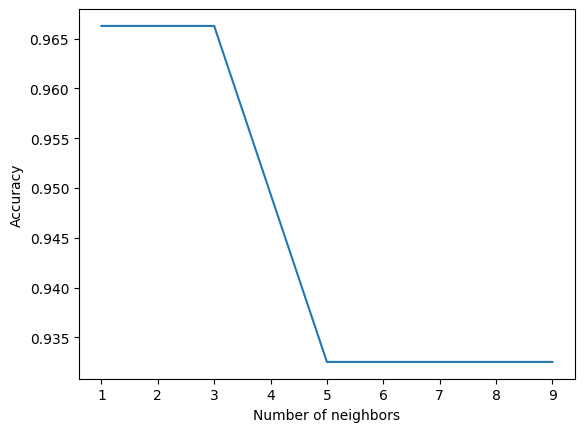

In [10]:
# train KNN classifiers with different numbers of neighbors
n_neighbors_values = np.arange(start=1, stop=11, step=2)

accuracies = []
for n_neighbors in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with n_neighbors={n_neighbors}: {accuracy:.2f}")

# plot the accuracies against the number of neighbors
plt.plot(n_neighbors_values, accuracies)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [11]:
#Use list of KNN algorithms and number of neighbors to test
knn_algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
n_neighbors_values = np.arange(start=1, stop=11, step=2)

# Iterate over KNN algorithms and number of neighbors
accuracy_results = []
best_accuracy = 0
best_n_neighbors = None
best_knn_algorithm = None

for knn_algorithm in knn_algorithms:
    accuracy_results_knn_algorithm = []
    for n_neighbors in n_neighbors_values:
        # Define KNN model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=knn_algorithm)
        
        # Train model on training set
        knn.fit(X_train, y_train)
        
        # Test model on testing set and calculate accuracy
        y_pred = knn.predict(X_test)
        accuracy = r2_score(y_test, y_pred)
        accuracy_results_knn_algorithm.append(accuracy)

        # Append accuracy results for this algorithm to overall list
        accuracy_results.append(accuracy_results_knn_algorithm)

        # Print results
        print(f'KNN algorithm: {knn_algorithm}, n_neighbors: {n_neighbors}, accuracy: {accuracy}')

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_neighbors = n_neighbors
            best_knn_algorithm = knn_algorithm

print("Best n_neighbors:", best_n_neighbors)
print("Best knn_algorithm:", best_knn_algorithm)
print("Best accuracy:", best_accuracy)

KNN algorithm: auto, n_neighbors: 1, accuracy: 0.9662668665667167
KNN algorithm: auto, n_neighbors: 3, accuracy: 0.9662668665667167
KNN algorithm: auto, n_neighbors: 5, accuracy: 0.9325337331334332
KNN algorithm: auto, n_neighbors: 7, accuracy: 0.9325337331334332
KNN algorithm: auto, n_neighbors: 9, accuracy: 0.9325337331334332
KNN algorithm: ball_tree, n_neighbors: 1, accuracy: 0.9662668665667167
KNN algorithm: ball_tree, n_neighbors: 3, accuracy: 0.9662668665667167
KNN algorithm: ball_tree, n_neighbors: 5, accuracy: 0.9325337331334332
KNN algorithm: ball_tree, n_neighbors: 7, accuracy: 0.9325337331334332
KNN algorithm: ball_tree, n_neighbors: 9, accuracy: 0.9325337331334332
KNN algorithm: kd_tree, n_neighbors: 1, accuracy: 0.9662668665667167
KNN algorithm: kd_tree, n_neighbors: 3, accuracy: 0.9662668665667167
KNN algorithm: kd_tree, n_neighbors: 5, accuracy: 0.9325337331334332
KNN algorithm: kd_tree, n_neighbors: 7, accuracy: 0.9325337331334332
KNN algorithm: kd_tree, n_neighbors: 9,

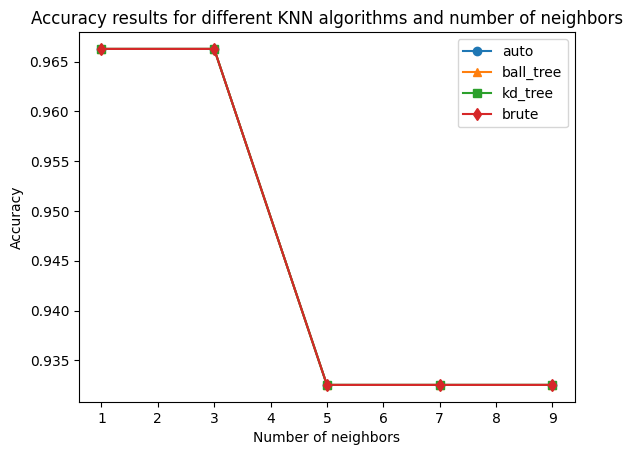

In [12]:
# Plot accuracy results

# Define markers to use for each algorithm
markers = ['o', '^', 's', 'd']

fig, ax = plt.subplots()
for i, knn_algorithm in enumerate(knn_algorithms):
    ax.plot(n_neighbors_values, accuracy_results[i], marker=markers[i], label=knn_algorithm)
ax.set_xlabel('Number of neighbors')
ax.set_ylabel('Accuracy')
ax.legend()
ax.set_title('Accuracy results for different KNN algorithms and number of neighbors')
plt.show()